In [1]:
import requests
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline

# Organização Dados

# Carregando dados Site

**Criando link com os cnpjs enviandos**

In [2]:
linkBase = 'https://www.receitaws.com.br/v1/cnpj/'

In [3]:
cnpjs = [16501555000157, 14994237000140, 18727053000174, 13966572000171, 12839955000116, 16569357000125, 16575851000100, 12592831000189]

In [4]:
def Criando_links(linkBase,cnpjs):
    links = [] 
    for cnpj in cnpjs:
        links.append(linkBase+str(cnpj))
    return links

**Acessando links**

In [5]:
def retirarDados(json):
    chaves = json.keys()
    removeItens = ['qsa','atividades_secundarias','billing','extra']
    jsonQSA = json['qsa']
    for item in removeItens:
        if item in chaves:
            del  json[item]
    json['atividade_principal_code'] = json['atividade_principal'][0]['code']
    json['atividade_principal'] = json['atividade_principal'][0]['text']
    json['abertura'] = datetime.strptime(json['abertura'],'%d/%M/%Y')
    print(json['abertura'])
    return json,jsonQSA

In [6]:
def pegarDadosLink(link):
    print('Pegando Dados:',link)
    site = requests.get(link)
    json = site.json()
    jsonEmp,jsonQSA = retirarDados(json)
    return jsonEmp,jsonQSA

In [7]:
def cria_tabelaQSA(tabelaAtual,qsa,cnpj):
    tabelaNova = pd.DataFrame(qsa)
    tabelaNova['CNPJ'] = [cnpj]*len(tabelaNova)
    tabelaNova =  pd.concat([tabelaAtual,tabelaNova])
    return tabelaNova

In [8]:
def pegarDadosLista(cnpjs,tempoConsulta=20):
    dicionario = {}
    dicinoarioQSA = {}
    tabelaQSA = pd.DataFrame()
    global linkBase
    links = Criando_links(linkBase,cnpjs)
    print(links)
    for i in range(len(links)):
        link = links[i]
        time.sleep(tempoConsulta)
        try:
            dados,qsa = pegarDadosLink(link)
            dicionario[cnpjs[i]] = dados
            tabelaQSA = cria_tabelaQSA(tabelaQSA,qsa,cnpjs[i])
        except:
            continue
            print('Error')
        
    tabelaCompa = pd.DataFrame(dicionario)
    tabelaCompa = tabelaCompa.transpose()
    return tabelaCompa,tabelaQSA

In [9]:
cnpjs = [16501555000157, 14994237000140, 18727053000174, 13966572000171, 12839955000116, 16569357000125, 16575851000100, 12592831000189]

In [10]:
tabelaComp,TabelaQSA = pegarDadosLista(cnpjs)

['https://www.receitaws.com.br/v1/cnpj/16501555000157', 'https://www.receitaws.com.br/v1/cnpj/14994237000140', 'https://www.receitaws.com.br/v1/cnpj/18727053000174', 'https://www.receitaws.com.br/v1/cnpj/13966572000171', 'https://www.receitaws.com.br/v1/cnpj/12839955000116', 'https://www.receitaws.com.br/v1/cnpj/16569357000125', 'https://www.receitaws.com.br/v1/cnpj/16575851000100', 'https://www.receitaws.com.br/v1/cnpj/12592831000189']
Pegando Dados: https://www.receitaws.com.br/v1/cnpj/16501555000157
2012-01-22 00:06:00
Pegando Dados: https://www.receitaws.com.br/v1/cnpj/14994237000140
2012-01-03 00:02:00
Pegando Dados: https://www.receitaws.com.br/v1/cnpj/18727053000174
2013-01-22 00:08:00
Pegando Dados: https://www.receitaws.com.br/v1/cnpj/13966572000171
2011-01-06 00:07:00
Pegando Dados: https://www.receitaws.com.br/v1/cnpj/12839955000116
2010-01-09 00:11:00
Pegando Dados: https://www.receitaws.com.br/v1/cnpj/16569357000125
2012-01-11 00:07:00
Pegando Dados: https://www.receitaws.

In [11]:
tabelaComp

,abertura,atividade_principal,atividade_principal_code,bairro,capital_social,cep,cnpj,complemento,data_situacao,data_situacao_especial,...,natureza_juridica,nome,numero,situacao,situacao_especial,status,telefone,tipo,uf,ultima_atualizacao
16501555000157,2012-01-22 00:06:00,Outras atividades de serviços prestados princi...,82.99-7-99,VILA OLIMPIA,491792277.61,04.551-010,16.501.555/0001-57,ANDAR 10 CONJ 102 TORRE A,22/06/2012,,...,205-4 - Sociedade Anônima Fechada,STONE PAGAMENTOS S.A.,308,ATIVA,,OK,(11) 3568-6318,MATRIZ,SP,2018-11-22T08:24:22.110Z
14994237000140,2012-01-03 00:02:00,Desenvolvimento e licenciamento de programas d...,62.02-3-00,CENTRO,10000.00,20.021-130,14.994.237/0001-40,SALA 0902,03/02/2012,,...,205-4 - Sociedade Anônima Fechada,MUNDIPAGG TECNOLOGIA EM PAGAMENTOS S.A.,375,ATIVA,,OK,(21) 3553-1230,MATRIZ,RJ,2018-10-18T00:52:11.637Z
18727053000174,2013-01-22 00:08:00,Desenvolvimento e licenciamento de programas d...,62.03-1-00,VILA OLIMPIA,1001000.00,04.551-010,18.727.053/0001-74,ANDAR 9 CONJ 91,22/08/2013,,...,205-4 - Sociedade Anônima Fechada,PAGAR.ME PAGAMENTOS S.A.,308,ATIVA,,OK,(11) 3031-2367,MATRIZ,SP,2018-11-19T14:16:07.611Z
13966572000171,2011-01-06 00:07:00,Desenvolvimento e licenciamento de programas d...,62.02-3-00,VILA OLIMPIA,1117796.00,04.547-006,13.966.572/0001-71,ANDAR 4,06/07/2011,,...,205-4 - Sociedade Anônima Fechada,CAPPTA S.A.,1609,ATIVA,,OK,(11) 4302-6160,MATRIZ,SP,2018-09-14T16:43:27.377Z
12839955000116,2010-01-09 00:11:00,Desenvolvimento de programas de computador sob...,62.01-5-01,VILA OLIMPIA,4206983.36,04.547-006,12.839.955/0001-16,ANDAR 3,09/11/2010,,...,205-4 - Sociedade Anônima Fechada,EQUALS SOCIEDADE ANONIMA,1609,ATIVA,,OK,(11) 2655-0800,MATRIZ,SP,2018-10-09T16:54:32.053Z
16569357000125,2012-01-11 00:07:00,Desenvolvimento de programas de computador sob...,62.01-5-01,VILA OLIMPIA,38553675.79,04.551-010,16.569.357/0001-25,ANDAR 10 CONJ 101 TORRE A,11/07/2012,,...,205-4 - Sociedade Anônima Fechada,BUY4 PROCESSAMENTO DE PAGAMENTOS S.A.,308,ATIVA,,OK,(11) 4105-2331,MATRIZ,SP,2018-08-25T07:37:10.867Z
16575851000100,2012-01-06 00:07:00,Holdings de instituições não-financeiras,64.62-0-00,VILA OLIMPIA,895899621.22,04.551-010,16.575.851/0001-00,ANDAR 11 CONJ 112,06/07/2012,,...,205-4 - Sociedade Anônima Fechada,DLP PAGAMENTOS BRASIL S.A.,308,ATIVA,,OK,(11) 4105-2331,MATRIZ,SP,2018-09-21T02:35:16.640Z
12592831000189,2010-01-21 00:09:00,Outras atividades de serviços prestados princi...,82.99-7-99,VILA OLIMPIA,476990302.00,04.551-010,12.592.831/0001-89,ANDAR 10 CONJ 103,21/09/2010,,...,205-4 - Sociedade Anônima Fechada,MNLT SOLUCOES DE PAGAMENTO S.A.,308,ATIVA,,OK,(11) 3259-0099,MATRIZ,SP,2018-08-22T16:41:04.593Z


In [12]:
tabelaComp.columns

Index(['abertura', 'atividade_principal', 'atividade_principal_code', 'bairro',
       'capital_social', 'cep', 'cnpj', 'complemento', 'data_situacao',
       'data_situacao_especial', 'efr', 'email', 'fantasia', 'logradouro',
       'motivo_situacao', 'municipio', 'natureza_juridica', 'nome', 'numero',
       'situacao', 'situacao_especial', 'status', 'telefone', 'tipo', 'uf',
       'ultima_atualizacao'],
      dtype='object')

In [13]:
TabelaQSA.head()

,nome,qual,CNPJ
0,AUGUSTO BARBOSA ESTELLITA LINS,10-Diretor,16501555000157
1,THIAGO DOS SANTOS PIAU,16-Presidente,16501555000157
2,CARLOS ALBERTO BORDINI,10-Diretor,16501555000157
3,RAFAEL MARTINS PEREIRA,10-Diretor,16501555000157
4,SANDRA RIBAS BOLFER,10-Diretor,16501555000157


# Escrevendo no excel

In [14]:
excel = pd.ExcelWriter('saida.xlsx')

In [15]:
TabelaQSA.to_excel(excel,sheet_name='QSA')

In [16]:
tabelaComp.to_excel(excel,sheet_name='Companhias')

In [17]:
excel.save()

# salvando no BD

In [18]:
import mysql.connector 
host = 'db4free.net'
database = 'desafiostone'
user = 'desafiostone'
password = 'stoneQ123'
port = 3306

#Conectando ao banco
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database)
cursor = con.cursor()
con.close()

In [19]:
class conectar:
        def __enter__(self):
            host = 'db4free.net'
            database = 'desafiostone'
            user = 'desafiostone'
            password = 'stoneQ123'
            port = 3306

            #Conectando ao banco
            con = mysql.connector.connect(user=user, 
                                          password=password,
                                          host=host,
                                          database=database)
            return con
        def __exit__(self, type, value, traceback):
            con.close()

In [20]:
with conectar() as con:
    print(con)

In [29]:
with conectar() as con:
    cursor = con.cursor()
    sql = "SELECT * FROM companhias"
    saida = cursor.execute(sql)
    print(saida)
    resultado = cursor.fetchall()
    for linha in resultado:
        print(linha)
    

None


In [31]:
con.close()
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database)
cursor = con.cursor()
sql = "SELECT * FROM companhias"
saida = cursor.execute(sql)
print(saida)
resultado = cursor.fetchall()
for linha in resultado:
    print(linha)
con.close()    

None


In [27]:
# def conectando():
#     host = 'db4free.net'
#     database = 'desafiostone'
#     user = 'desafiostone'
#     password = 'stoneQ123'
#     port = 3306
    
#     con = mysql.connector.connect(user=user, 
#                               password=password,
#                               host=host,
#                               database=database)
#     cursor = con.cursor()
#     return con,cursor 

In [30]:
def criarTabelas():
    with conectar() as con:
        cursor = con.cursor()
        sql = "CREATE TABLE companhias (" \
              " cnpj VARCHAR(20) NOT NULL," \
              " nome VARCHAR(100) NOT NULL," \
              " atividade_principal VARCHAR(100)," \
              " data_de_abertura DATETIME ," \
              " capital_social DOUBLE," \
              " bairro VARCHAR(100)," \
              " cep VARCHAR(50)," \
              " complemento VARCHAR(100)," \
              " numero INTEGER," \
              " logradouro VARCHAR(100)," \
              " municipio VARCHAR(100)," \
              " data_situacao DATETIME ," \
              " natureza_juridica VARCHAR(100)," \
              " telefone VARCHAR(20)," \
              " tipo VARCHAR(20)," \
              " uf VARCHAR(20)," \
              " email VARCHAR(100),"\
              " fantasia VARCHAR(100)," \
              " PRIMARY KEY (cnpj));"
        cursor.execute(sql)

        sql = "CREATE TABLE QSA (" \
              " nome VARCHAR(100)," \
              " qual VARCHAR(100) NOT NULL," \
              " cnpj VARCHAR(100));"
        cursor.execute(sql)

In [31]:
def inserirCompanhia(linha):
    with conectar() as con:
        cursor = con.cursor()
        sql = "INSERT INTO companhias (cnpj,nome,atividade_principal,data_de_abertura,capital_social)  VALUES (%s,%s,%s,%s,%s)"
        val = (linha['cnpj'], linha['nome'], linha['atividade_principal'], linha['abertura'], linha['capital_social'])
        cursor.execute(sql, val)
        con.commit()


In [51]:
def inserirQSA(linha):
     with conectar() as con:
        cursor = con.cursor()
        sql = "INSERT INTO `QSA`(`nome`, `qual`, `cnpj`) VALUES (%s,%s,%s)"
        val = (linha['nome'], linha['qual'], str(linha['CNPJ']))
        print(val)
        cursor.execute(sql, val)
        con.commit()

In [52]:
def escreverCompanhias(tabela):
    for n_linha in range(len(tabela)):
        linha = tabela.iloc[n_linha]
        inserirCompanhia(linha)

def escreverQSA(tabela):
    for n_linha in range(len(tabela)):
        linha = tabela.iloc[n_linha]
        inserirQSA(linha)

In [53]:
criarTabelas()
escreverCompanhias(tabelaComp)
escreverQSA(TabelaQSA)

('AUGUSTO BARBOSA ESTELLITA LINS', '10-Diretor', '16501555000157')
('THIAGO DOS SANTOS PIAU', '16-Presidente', '16501555000157')
('CARLOS ALBERTO BORDINI', '10-Diretor', '16501555000157')
('RAFAEL MARTINS PEREIRA', '10-Diretor', '16501555000157')
('SANDRA RIBAS BOLFER', '10-Diretor', '16501555000157')
('MAURICIO DE OLIVEIRA ZANELLA', '10-Diretor', '16501555000157')
('CAIO FIUZA SILVA', '10-Diretor', '16501555000157')
('VINICIUS DO NASCIMENTO CARRASCO', '10-Diretor', '16501555000157')
('AMANDA LUZ SANT ANNA', '10-Diretor', '14994237000140')
('RODRIGO SOUZA DO NASCIMENTO', '10-Diretor', '14994237000140')
('JOAO AUGUSTO DE SOUZA BARCELLOS', '10-Diretor', '14994237000140')
('DANIELA MASTROROCCO', '10-Diretor', '14994237000140')
('ANDREIA ALMEIDA SAAB', '10-Diretor', '14994237000140')
('THIAGO DOS SANTOS PIAU', '16-Presidente', '18727053000174')
('CARLOS ALBERTO BORDINI', '10-Diretor', '18727053000174')
('RAFAEL MARTINS PEREIRA', '10-Diretor', '18727053000174')
('SANDRA RIBAS BOLFER', '10-D

# Analizando dados com Pandas

**2. Qual o capital social de cada CIA, em valor e % do total?**

In [54]:
tabelaComp['capital_social']

16501555000157    491792277.61
14994237000140        10000.00
18727053000174      1001000.00
13966572000171      1117796.00
12839955000116      4206983.36
16569357000125     38553675.79
16575851000100    895899621.22
12592831000189    476990302.00
Name: capital_social, dtype: object

**Grafico**

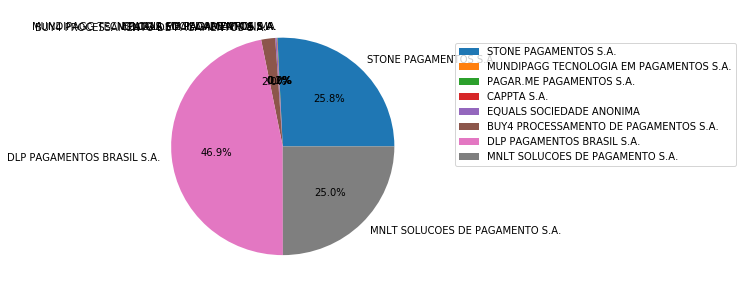

In [55]:
plt.figure(figsize=(5,5))
plt.pie(tabelaComp['capital_social'],autopct='%1.1f%%',labels=tabelaComp['nome']);
plt.legend(bbox_to_anchor=(1.1,0.9))

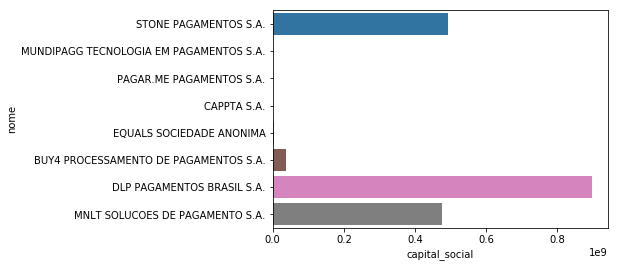

In [56]:
import seaborn as sns 
tabelaComp['capital_social'] =tabelaComp['capital_social'].astype(float)
sns.barplot(data = tabelaComp,y='nome',x='capital_social')

**3.	Listar os acionistas (QSA) que estão em mais de uma empresa,  apresentando o nome do acionista, a quantidade de empresas que ele é sócio e listar as empresas**

In [57]:
tabelaQSA2 = TabelaQSA.groupby('nome').count()
tabelaQSA2.drop('qual',axis=1,inplace=True)

In [58]:
tabelaQSA2 = tabelaQSA2[tabelaQSA2['CNPJ'] > 1]
tabelaQSA2.sort_values(by='CNPJ',ascending=False)

,CNPJ
nome,
THIAGO DOS SANTOS PIAU,5
RAFAEL MARTINS PEREIRA,4
AUGUSTO BARBOSA ESTELLITA LINS,3
CAIO FIUZA SILVA,3
CARLOS ALBERTO BORDINI,3
FABIO AUGUSTO CANTIZANI BARBOSA,3
MAURICIO DE OLIVEIRA ZANELLA,3
SANDRA RIBAS BOLFER,3
AMANDA LUZ SANT ANNA,2
